#Ë≤∏Ê¨æÁî®Êà∂ÁâπÂæµÂàÜÊûê

##Âü∫Á§éË≥áÊñôÂàÜÊûê


###Ë≥áÊñôËºâÂÖ•

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from scipy.stats import kurtosis
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [2]:
file_path = "/content/Bank_Personal_Loan_Modelling.xlsx"
xls = pd.ExcelFile(file_path)
df = pd.read_excel(xls, sheet_name="Data")

In [3]:
print(df)

        ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  \
0        1   25           1      49     91107       4    1.6          1   
1        2   45          19      34     90089       3    1.5          1   
2        3   39          15      11     94720       1    1.0          1   
3        4   35           9     100     94112       1    2.7          2   
4        5   35           8      45     91330       4    1.0          2   
...    ...  ...         ...     ...       ...     ...    ...        ...   
4995  4996   29           3      40     92697       1    1.9          3   
4996  4997   30           4      15     92037       4    0.4          1   
4997  4998   63          39      24     93023       2    0.3          3   
4998  4999   65          40      49     90034       3    0.5          2   
4999  5000   28           4      83     92612       3    0.8          1   

      Mortgage  Personal Loan  Securities Account  CD Account  Online  \
0            0            

###Ê™¢Êü•ÈáçË§áÂÄº

In [4]:
duplicate_rows = df.duplicated().sum()

In [5]:
print(f"ÈáçË§áÂÄºÊï∏Èáè: {duplicate_rows}")

ÈáçË§áÂÄºÊï∏Èáè: 0


###Ê™¢Êü•Áº∫Â§±ÂÄº

In [6]:
missing_values = df.isnull().sum()

In [7]:
print(f"Áº∫Â§±ÂÄºÊï∏Èáè:\n{missing_values}")

Áº∫Â§±ÂÄºÊï∏Èáè:
ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64


###Ê™¢Êü•ÊòØÂê¶ÊúâÁï∞Â∏∏Ë≤†ÂÄº

Zip CodeÊ†ºÂºèÊ™¢Êü•

In [8]:
zip_code_validity = df["ZIP Code"].astype(str).apply(lambda x: len(x) == 5 and x.isdigit())

In [9]:
print(zip_code_validity.value_counts())

ZIP Code
True     4999
False       1
Name: count, dtype: int64


Âà™Èô§Áï∞Â∏∏ÂÄº

In [10]:
invalid_zip_code_row = df[~df["ZIP Code"].astype(str).apply(lambda x: len(x) == 5 and x.isdigit())]
df_cleaned = df[~df.index.isin(invalid_zip_code_row.index)].copy()
zip_code_validity_after = df_cleaned["ZIP Code"].astype(str).apply(lambda x: len(x) == 5 and x.isdigit()).all()
zip_code_validity_after, df_cleaned.shape

(np.True_, (4999, 14))

Ë≤∏Ê¨æÊï∏È°çÁï∞Â∏∏ÂÄºÊ™¢Êü•

In [11]:
negative_loan_values = df_cleaned[df_cleaned["Personal Loan"] < 0]
negative_loan_values.count()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

Ê™¢Êü• Experience ÊòØÂê¶ÊúâË≤†Êï∏

In [12]:
experience_anomalies = df[df["Experience"] < 0]

In [13]:
experience_anomalies

ID  Age  Experience  Income  ZIP Code  Family     CCAvg  Education  \
89      90   25          -1     113     94303       4  2.300000          3   
226    227   24          -1      39     94085       2  1.700000          2   
315    316   24          -2      51     90630       3  0.300000          3   
451    452   28          -2      48     94132       2  1.750000          3   
524    525   24          -1      75     93014       4  0.200000          1   
536    537   25          -1      43     92173       3  2.400000          2   
540    541   25          -1     109     94010       4  2.300000          3   
576    577   25          -1      48     92870       3  0.300000          3   
583    584   24          -1      38     95045       2  1.700000          2   
597    598   24          -2     125     92835       2  7.200000          1   
649    650   25          -1      82     92677       4  2.100000          3   
670    671   23          -1      61     92374       4  2.600000          1   
686    687   24          -1      38     92612       4  0.600000          2   
793    794   24          -2     150     94720       2  2.000000          1   
889    890   24          -2      82     91103       2  1.600000          3   
909    910   23          -1     149     91709       1  6.333333          1   
1173  1174   24          -1      35     94305       2  1.700000          2   
1428  1429   25          -1      21     94583       4  0.400000          1   
1522  1523   25          -1     101     94720       4  2.300000          3   
1905  1906   25          -1     112     92507       2  2.000000          1   
2102  2103   25          -1      81     92647       2  1.600000          3   
2430  2431   23          -1      73     92120       4  2.600000          1   
2466  2467   24          -2      80     94105       2  1.600000          3   
2545  2546   25          -1      39     94720       3  2.400000          2   
2618  2619   23          -3      55     92704       3  2.400000          2   
2717  2718   23          -2      45     95422       4  0.600000          2   
2848  2849   24          -1      78     94720       2  1.800000          2   
2876  2877   24          -2      80     91107       2  1.600000          3   
2962  2963   23          -2      81     91711       2  1.800000          2   
2980  2981   25          -1      53     94305       3  2.400000          2   
3076  3077   29          -1      62     92672       2  1.750000          3   
3130  3131   23          -2      82     92152       2  1.800000          2   
3157  3158   23          -1      13     94720       4  1.000000          1   
3279  3280   26          -1      44     94901       1  2.000000          2   
3284  3285   25          -1     101     95819       4  2.100000          3   
3292  3293   25          -1      13     95616       4  0.400000          1   
3394  3395   25          -1     113     90089       4  2.100000          3   
3425  3426   23          -1      12     91605       4  1.000000          1   
3626  3627   24          -3      28     90089       4  1.000000          3   
3796  3797   24          -2      50     94920       3  2.400000          2   
3824  3825   23          -1      12     95064       4  1.000000          1   
3887  3888   24          -2     118     92634       2  7.200000          1   
3946  3947   25          -1      40     93117       3  2.400000          2   
4015  4016   25          -1     139     93106       2  2.000000          1   
4088  4089   29          -1      71     94801       2  1.750000          3   
4116  4117   24          -2     135     90065       2  7.200000          1   
4285  4286   23          -3     149     93555       2  7.200000          1   
4411  4412   23          -2      75     90291       2  1.800000          2   
4481  4482   25          -2      35     95045       4  1.000000          3   
4514  4515   24          -3      41     91768       4  1.000000          3   
4582  4583   25          -1   

ÁôºÁèæÂ∑•‰ΩúÁ∂ìÈ©óÁöÑÁï∞Â∏∏ÂÄºÁôºÁîüÂú®20Âà∞29Ê≠≤‰πãÈñì,Áî±ÊñºÊï∏ÊìöÊú¨Ë∫´ËºÉÂ∞ë,ÈÅãÁî®‰∏≠‰ΩçÊï∏Ë£úÈΩäË©≤Êï∏Êìö,Ê∏õÂ∞ëÊ•µÁ´ØÂÄº‰∏¶‰∏îÁÇ∫ÂÄºÊï∏ÊìöÁ©©ÂÆö

In [14]:
median_experience_20s = df_cleaned[(df_cleaned["Age"] >= 20) & (df_cleaned["Age"] <= 29) & (df_cleaned["Experience"] >= 0)]["Experience"].median()
df_cleaned.loc[(df_cleaned["Age"] >= 20) & (df_cleaned["Age"] <= 29) & (df_cleaned["Experience"] < 0), "Experience"] = median_experience_20s
experience_anomalies_after = df_cleaned[df_cleaned["Experience"] < 0]

experience_anomalies_after.count()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

###Ë™øÊï¥CCAVGÁöÑÊôÇÈñìË∑®Â∫¶(ÊúàËΩâÂπ¥)

In [15]:
df["CCAvg_Annual"] = df["CCAvg"] * 12
df[["CCAvg", "CCAvg_Annual", "Income"]].head()

CCAvg  CCAvg_Annual  Income
0    1.6          19.2      49
1    1.5          18.0      34
2    1.0          12.0      11
3    2.7          32.4     100
4    1.0          12.0      45

###‰ø°Áî®Âç°Ê∂àË≤ª‰ΩîÂπ¥Â∫¶Êî∂ÂÖ•ÊØî

In [16]:
df["Credit_Usage_Ratio"] = df["CCAvg_Annual"] / df["Income"]

In [17]:
df["Credit_Usage_Ratio"]

0       0.391837
1       0.529412
2       1.090909
3       0.324000
4       0.266667
          ...   
4995    0.570000
4996    0.320000
4997    0.150000
4998    0.122449
4999    0.115663
Name: Credit_Usage_Ratio, Length: 5000, dtype: float64

 ###Mortgage ÁöÑÂ≥∞Â∫¶

In [18]:
mortgage_kurtosis = kurtosis(df["Mortgage"], fisher=True)

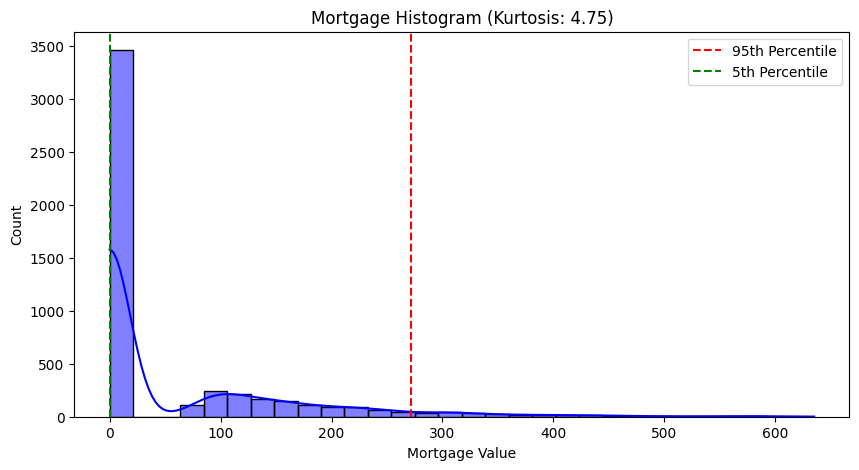

In [19]:
plt.figure(figsize=(10, 5))
sns.histplot(df["Mortgage"], bins=30, kde=True, color='blue')
plt.axvline(np.percentile(df["Mortgage"], 95), color='red', linestyle='dashed', label="95th Percentile")
plt.axvline(np.percentile(df["Mortgage"], 5), color='green', linestyle='dashed', label="5th Percentile")
plt.xlabel("Mortgage Value")
plt.ylabel("Count")
plt.title(f"Mortgage Histogram (Kurtosis: {mortgage_kurtosis:.2f})")
plt.legend()
plt.show()

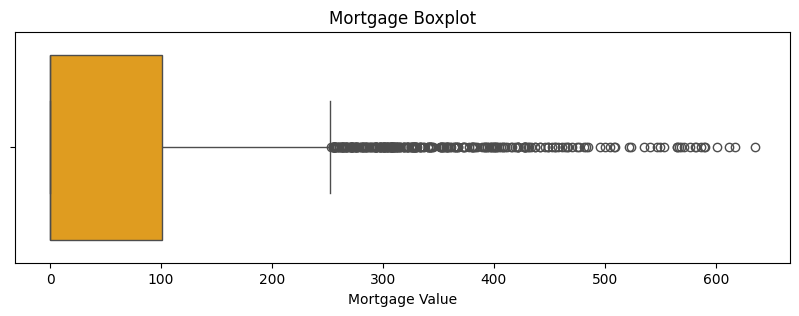

In [20]:
plt.figure(figsize=(10, 3))
sns.boxplot(x=df["Mortgage"], color='orange')
plt.xlabel("Mortgage Value")
plt.title("Mortgage Boxplot")
plt.show()


In [21]:
high_mortgage_threshold = np.percentile(df["Mortgage"], 95)
df["High_Mortgage"] = (df["Mortgage"] >= high_mortgage_threshold).astype(int)

df["High_Mortgage"].value_counts()

High_Mortgage
0    4748
1     252
Name: count, dtype: int64

###ÂÖ±Á∑öÊÄßÂïèÈ°åÊ™¢È©ó

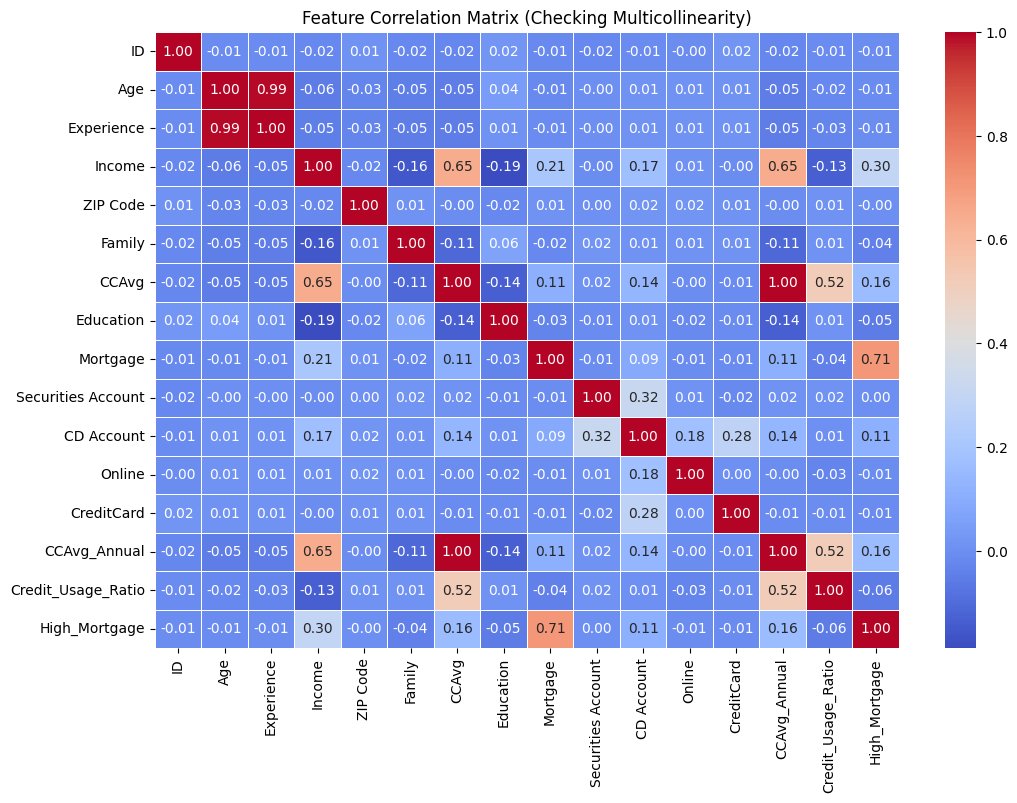

In [22]:
Z = df.drop(columns=["Personal Loan"])
correlation_matrix = Z.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Matrix (Checking Multicollinearity)")
plt.show()


In [23]:
high_corr_features = [(col1, col2, correlation_matrix.loc[col1, col2])
                      for col1 in correlation_matrix.columns
                      for col2 in correlation_matrix.columns
                      if col1 != col2 and abs(correlation_matrix.loc[col1, col2]) > 0.75]

high_corr_features

[('Age', 'Experience', np.float64(0.9942148569683337)),
 ('Experience', 'Age', np.float64(0.9942148569683337)),
 ('CCAvg', 'CCAvg_Annual', np.float64(0.999999999999993)),
 ('CCAvg_Annual', 'CCAvg', np.float64(0.999999999999993))]

ÈÅ∏ÊìáAGE,Âõ†ÁÇ∫Á∂ìÈ©óËàáÂπ¥ÈΩ°È´òÂ∫¶Áõ∏ÈóúÂèØËÉΩÈÄ†ÊàêÂÖ±ÊÜ≤ÊÄßÂïèÈ°å,ÊúÄÂæåÈÅ∏Áî®ageÊòØÂõ†ÁÇ∫Êõ¥ÁÇ∫ÂÄºËßÄ‰∏îÂú®Ë≤∏Ê¨æÂØ©Ê†∏ÊôÇÂ∑•‰ΩúÁ∂ìÈ©óÊòØÊúâÂèØËÉΩ‰º™ÈÄ†ÁöÑ


In [24]:
df.drop(columns=["Experience"], inplace=True)

In [25]:
df.drop(columns=["CCAvg"], inplace=True)

##ÁâπÂæµÂàÜÊûê

Ê®ôÁ±§ÂàÜÈõ¢

In [26]:
X = df.drop(columns=["Personal Loan"])
y = df["Personal Loan"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)




Smote ‰øÆÊ≠£Ë®ìÁ∑¥Ë≥áÊñôÊØî‰æãÂ§±Ë°°ÊØî‰æãÂïèÈ°å

In [27]:
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

y_train_resampled_series = pd.Series(y_train_resampled)
loan_counts_after_smote = y_train_resampled_series.value_counts(normalize=True) * 100
print("SMOTE ÈÅéÊé°Ê®£ÂæåÁöÑ Personal Loan ÂàÜ‰ΩàÔºö")
print(loan_counts_after_smote)

SMOTE ÈÅéÊé°Ê®£ÂæåÁöÑ Personal Loan ÂàÜ‰ΩàÔºö
Personal Loan
0    50.0
1    50.0
Name: proportion, dtype: float64


###Á∑öÊÄßÁâπÂæµÂàÜÊûêÊ®°Âûã

####ÈÇèËºØÂõûÊ≠∏Ê®°Âûã

In [28]:
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_resampled, y_train_resampled)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000, random_state=42)

####Ê±∫Á≠ñÊ®πÊ®°Âûã

In [29]:
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train_resampled, y_train_resampled)

DecisionTreeClassifier(random_state=42)

###ÈùûÁ∑öÊÄßÁâπÂæµÂàÜÊûêÊ®°Âûã

####Èö®Ê©üÊ£ÆÊûóÊ®°Âûã

In [30]:
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(random_state=42)

####SVMÊ®°Âûã

In [31]:
svm_clf = SVC(kernel='linear', probability=True, random_state=42)
svm_clf.fit(X_train_resampled, y_train_resampled)

SVC(kernel='linear', probability=True, random_state=42)

###ÁâπÂæµÈáçË¶ÅÊÄßÊ™¢È©ó

In [32]:
log_reg_coef = np.abs(log_reg.coef_).flatten()
tree_feature_importance = tree_clf.feature_importances_
rf_feature_importance = rf_clf.feature_importances_

In [33]:
feature_names = X_train.columns

In [34]:
print(feature_names)

Index(['ID', 'Age', 'Income', 'ZIP Code', 'Family', 'Education', 'Mortgage',
       'Securities Account', 'CD Account', 'Online', 'CreditCard',
       'CCAvg_Annual', 'Credit_Usage_Ratio', 'High_Mortgage'],
      dtype='object')


In [35]:
feature_importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Logistic_Regression": log_reg_coef,
    "Decision_Tree": tree_feature_importance,
    "Random_Forest": rf_feature_importance
}).set_index("Feature")

In [36]:
print(feature_importance_df)

                    Logistic_Regression  Decision_Tree  Random_Forest
Feature                                                              
ID                             0.000105       0.021764       0.027705
Age                            0.002101       0.026233       0.029597
Income                         0.052308       0.657579       0.401951
ZIP Code                       0.000085       0.020719       0.027507
Family                         0.079196       0.078956       0.046416
Education                      1.084307       0.062247       0.057517
Mortgage                       0.001567       0.008320       0.020615
Securities Account             0.306259       0.001049       0.004958
CD Account                     0.420077       0.002097       0.010311
Online                         0.921734       0.002709       0.014461
CreditCard                     0.912372       0.006877       0.022518
CCAvg_Annual                   0.022164       0.072318       0.248545
Credit_Usage_Ratio  

###Ê®°ÂûãË©ï‰º∞

In [37]:
models = {
    "Logistic Regression": log_reg,
    "Decision Tree": tree_clf,
    "Random Forest": rf_clf,
    "SVM": svm_clf
}

accuracy_results = {}
classification_reports = {}

for name, model in models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_results[name] = accuracy
    classification_reports[name] = classification_report(y_test, y_pred, output_dict=True)


In [38]:
print("ÁâπÂæµÈáçË¶ÅÊÄßÊØîËºÉÔºö")
print(feature_importance_df)


ÁâπÂæµÈáçË¶ÅÊÄßÊØîËºÉÔºö
                    Logistic_Regression  Decision_Tree  Random_Forest
Feature                                                              
ID                             0.000105       0.021764       0.027705
Age                            0.002101       0.026233       0.029597
Income                         0.052308       0.657579       0.401951
ZIP Code                       0.000085       0.020719       0.027507
Family                         0.079196       0.078956       0.046416
Education                      1.084307       0.062247       0.057517
Mortgage                       0.001567       0.008320       0.020615
Securities Account             0.306259       0.001049       0.004958
CD Account                     0.420077       0.002097       0.010311
Online                         0.921734       0.002709       0.014461
CreditCard                     0.912372       0.006877       0.022518
CCAvg_Annual                   0.022164       0.072318       0.24

In [39]:
print("\nÊ®°ÂûãÊ∫ñÁ¢∫Â∫¶ÊØîËºÉÔºö")
print(accuracy_results)


Ê®°ÂûãÊ∫ñÁ¢∫Â∫¶ÊØîËºÉÔºö
{'Logistic Regression': 0.867, 'Decision Tree': 0.955, 'Random Forest': 0.968, 'SVM': 0.858}


##Êï∏ÊìöÂèØË¶ñÂåñ

In [40]:
sns.set(style="whitegrid")

###Êî∂ÂÖ•ÂàÜ‰ΩàÊØîËºÉ

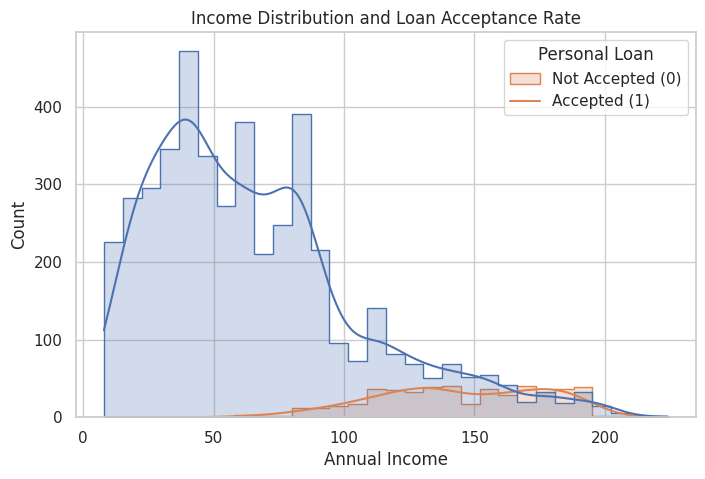

In [41]:
plt.figure(figsize=(8, 5))
sns.histplot(df, x="Income", hue="Personal Loan", kde=True, bins=30, element="step")
plt.title("Income Distribution and Loan Acceptance Rate")
plt.xlabel("Annual Income")
plt.ylabel("Count")
plt.legend(title="Personal Loan", labels=["Not Accepted (0)", "Accepted (1)"])
plt.show()

### ÊïôËÇ≤Á®ãÂ∫¶ÂàÜ‰ΩàÊØîËºÉ

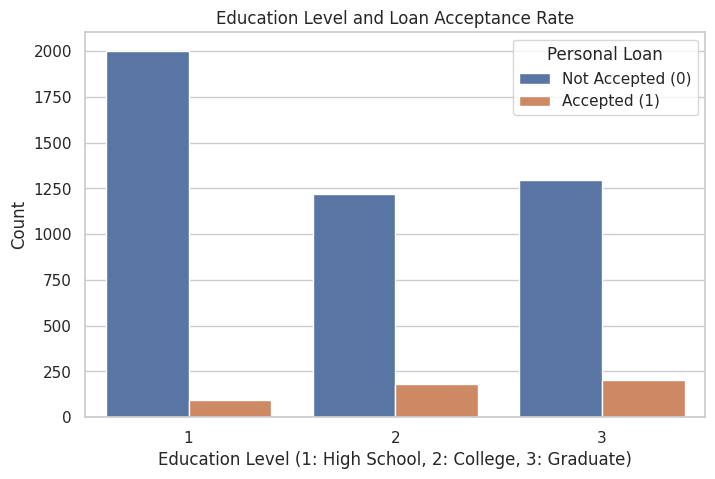

In [42]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x="Education", hue="Personal Loan")
plt.title("Education Level and Loan Acceptance Rate")
plt.xlabel("Education Level (1: High School, 2: College, 3: Graduate)")
plt.ylabel("Count")
plt.legend(title="Personal Loan", labels=["Not Accepted (0)", "Accepted (1)"])
plt.show()


###‰ø°Áî®Âç°ÊåÅÊúâËÄÖ vs. Ë≤∏Ê¨æÊé•ÂèóÁéá

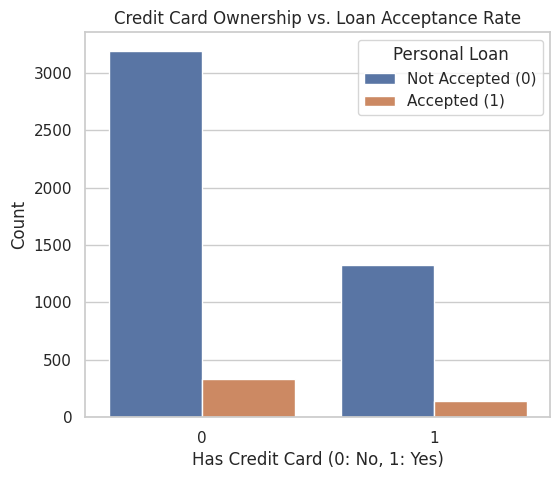

In [43]:
plt.figure(figsize=(6, 5))
sns.countplot(data=df, x="CreditCard", hue="Personal Loan")
plt.title("Credit Card Ownership vs. Loan Acceptance Rate")
plt.xlabel("Has Credit Card (0: No, 1: Yes)")
plt.ylabel("Count")
plt.legend(title="Personal Loan", labels=["Not Accepted (0)", "Accepted (1)"])
plt.show()


### ÊåÅÊúâ CD Â∏≥Êà∂ vs. Ë≤∏Ê¨æÊé•ÂèóÁéá

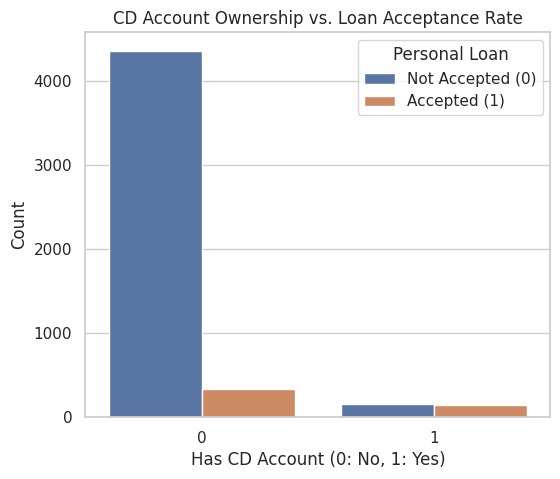

In [44]:
plt.figure(figsize=(6, 5))
sns.countplot(data=df, x="CD Account", hue="Personal Loan")
plt.title("CD Account Ownership vs. Loan Acceptance Rate")
plt.xlabel("Has CD Account (0: No, 1: Yes)")
plt.ylabel("Count")
plt.legend(title="Personal Loan", labels=["Not Accepted (0)", "Accepted (1)"])
plt.show()

### ‰ø°Áî®Âç°Ê∂àË≤ªÁéá vs. Ë≤∏Ê¨æÊé•ÂèóÁéá

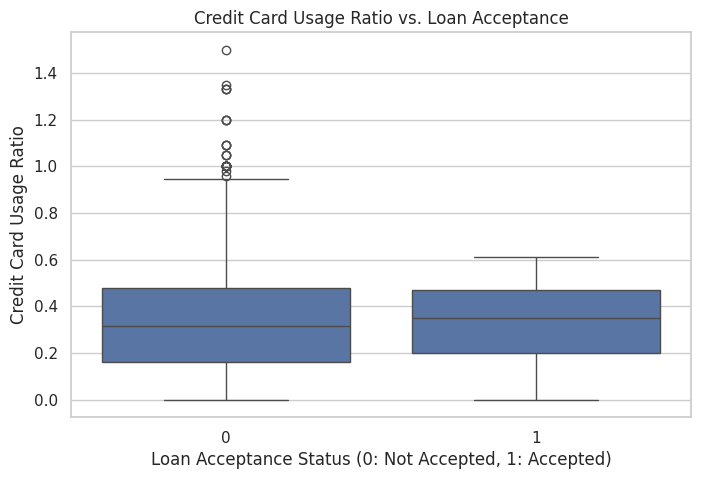

In [45]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x="Personal Loan", y="Credit_Usage_Ratio")
plt.title("Credit Card Usage Ratio vs. Loan Acceptance")
plt.xlabel("Loan Acceptance Status (0: Not Accepted, 1: Accepted)")
plt.ylabel("Credit Card Usage Ratio")
plt.show()

##ÊΩõÂú®Ë≤∏Ê¨æËÄÖÁî®Êà∂ÊèèËø∞

###K-MeanÁî®Êà∂ÂàÜÈ°û

In [46]:
features_for_clustering = ["Income", "Education", "CreditCard", "CD Account", "High_Mortgage", "Online"]

missing_cols = [col for col in features_for_clustering if col not in df.columns]
if missing_cols:
    raise ValueError(f"‚ùå Áº∫Â∞ë‰ª•‰∏ãÊ¨Ñ‰ΩçÔºö{missing_cols}")
else:
    print("‚úÖ ÊâÄÊúâÂøÖË¶ÅÊ¨Ñ‰ΩçÈÉΩÂ≠òÂú®ÔºÅ")

X_cluster = df[features_for_clustering].dropna()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)

k_range = range(2, 11)
sse = []
silhouette_scores = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)

    sse.append(kmeans.inertia_)

    silhouette_avg = silhouette_score(X_scaled, labels)
    silhouette_scores.append(silhouette_avg)

‚úÖ ÊâÄÊúâÂøÖË¶ÅÊ¨Ñ‰ΩçÈÉΩÂ≠òÂú®ÔºÅ


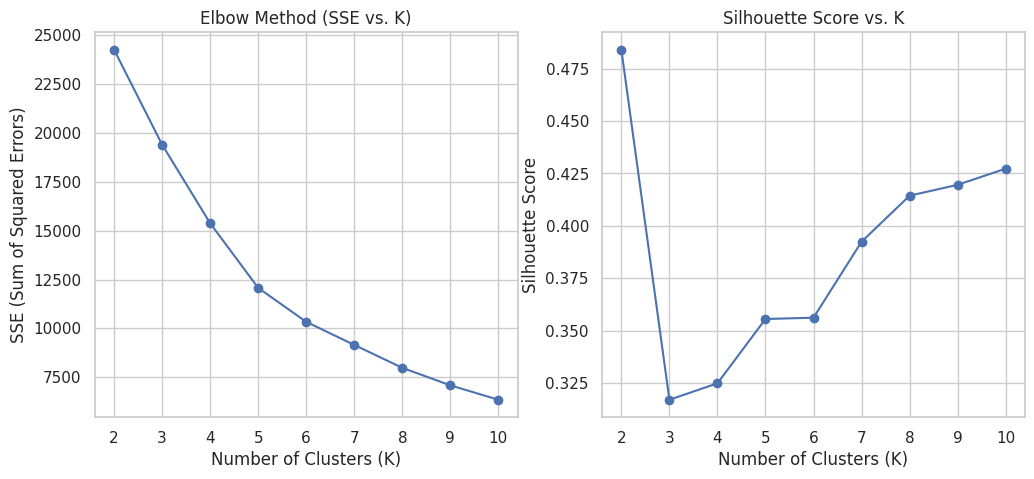

In [47]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(k_range, sse, marker='o', linestyle='-')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("SSE (Sum of Squared Errors)")
plt.title("Elbow Method (SSE vs. K)")

# Áπ™Ë£Ω Silhouette Score vs. K
plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_scores, marker='o', linestyle='-')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score vs. K")

plt.show()

K=5 ÊòØÊØîËºÉÂπ≥Ë°°ÁöÑÈÅ∏ÊìáÔºö

Elbow MethodÔºö‰ªçËÉΩÈôç‰Ωé SSEÔºå‰ΩÜ‰∏çÊúÉÈÅéÂ∫¶Â¢ûÂä†Áæ§ÈõÜÊï∏Èáè„ÄÇ

Silhouette ScoreÔºöÂú® K=5 ÈñãÂßãÂõûÂçáÔºå‰ª£Ë°®Áæ§ÈõÜÂìÅË≥™ÊèêÂçá„ÄÇ

Ë°åÈä∑ÊáâÁî®Ôºö5 ÂÄãÁæ§ÁµÑ‰ªçÁÑ∂ÂÆπÊòìËß£ÈáãÔºåÂèØ‰ª•ÊúâÊïàË¶èÂäÉË≤∏Ê¨æË°åÈä∑Á≠ñÁï•„ÄÇ

###Áî®Êà∂ÊèèËø∞

In [54]:
features_for_clustering = ["Income", "Education", "CreditCard", "CD Account", "High_Mortgage", "Online"]

X_cluster = df[features_for_clustering].dropna()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)

kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
df.loc[X_cluster.index, "Cluster_4"] = kmeans.fit_predict(X_scaled)

cluster_summary_k4 = df.groupby("Cluster_4")[features_for_clustering].mean()

from IPython.display import display
display(cluster_summary_k4)

Income  Education  CreditCard  CD Account  High_Mortgage  \
Cluster_4                                                                 
0.0         69.891450   1.901115    0.000000    0.000000            0.0   
1.0         69.949257   1.899539    0.000000    0.000000            0.0   
2.0        133.087302   1.686508    0.273810    0.174603            1.0   
3.0         97.945736   1.910853    0.802326    1.000000            0.0   
4.0         66.656616   1.862647    1.000000    0.000000            0.0   

             Online  
Cluster_4            
0.0        0.000000  
1.0        1.000000  
2.0        0.583333  
3.0        0.937984  
4.0        0.539363

In [56]:
loan_acceptance_summary = df.groupby("Cluster_4")["Personal Loan"].mean()

loan_acceptance_df = pd.DataFrame(loan_acceptance_summary).rename(columns={"Personal Loan": "Loan Acceptance Rate"})
display(loan_acceptance_df)

Loan Acceptance Rate
Cluster_4                      
0.0                    0.077323
1.0                    0.070733
2.0                    0.349206
3.0                    0.414729
4.0                    0.036013

Cluster 2 Ë∑ü Cluster 3 ÁöÑË≤∏Ê¨æÊé•ÂèóÁéáÊúÄÈ´òÔºåÈÄôË°®Á§∫ÈÄôÂÖ©ÂÄãÁæ§ÁµÑÊòØÊúÄÊúâÂèØËÉΩÊàêÁÇ∫Ë≤∏Ê¨æÂÆ¢Êà∂ÁöÑÁõÆÊ®ôÊóèÁæ§

Cluster 3ÔºöÊΩõÂú®È´òÈ°çË≤∏Ê¨æÂÆ¢Áæ§

ÁâπÂæµÂàÜÊûêÔºö

*   Êî∂ÂÖ• (Income)Ôºö97.95KÔºåÂ±¨Êñº‰∏≠È´òÊî∂ÂÖ•Áæ§È´î
*   ÊïôËÇ≤Á®ãÂ∫¶ (Education)Ôºö1.91ÔºåÊé•ËøëÂ§ßÂ≠∏ÊïôËÇ≤Ê∞¥Âπ≥
*   ‰ø°Áî®Âç°ÊåÅÊúâÁéá (CreditCard)Ôºö80.2% ÊìÅÊúâ‰ø°Áî®Âç°
*   ÂÆöÂ≠òÂ∏≥Êà∂ (CD Account)Ôºö100% ÊìÅÊúâÂÆöÂ≠òÂ∏≥Êà∂
*   È´òÈ°çÊàøË≤∏ (High_Mortgage)Ôºö0%ÔºåÂπæ‰πéÁÑ°È´òÈ°çÊàøË≤∏
*   Á∂≤Ë∑ØÈäÄË°å‰ΩøÁî®Áéá (Online)Ôºö93.8%ÔºåÈùûÂ∏∏‰æùË≥¥Á∂≤Ë∑ØÈäÄË°å
*   Ë≤∏Ê¨æÊé•ÂèóÁéá (Loan Acceptance Rate)Ôºö41.47%ÔºåÊúÄÈ´òË≤∏Ê¨æÊé•ÂèóÁéá

ÂèØËÉΩÁöÑË°åÁÇ∫Ê®°ÂºèÔºö

*   Ë≤°ÂãôÁãÄÊ≥ÅÁ©©ÂÆöÔºåÂÖ∑ÊúâÈ´òÁêÜË≤°ÊÑèË≠ò
*   È´ò‰ø°Áî®Âç°‰ΩøÁî®ÁéáÔºåÂèØËÉΩÊúâËºÉÈ´òÊ∂àË≤ªÁøíÊÖ£
*   ÂÅèÂ•Ω‰ΩøÁî®Êï∏‰ΩçÈäÄË°åÊúçÂãôÔºåËºÉÂ∞ë‰æùË≥¥ÂØ¶È´îÈäÄË°å
*   ÁÑ°È´òÈ°çÊàøË≤∏ÔºåÂèØËÉΩÊúâËºÉÂ§ßÁöÑÂèØÊîØÈÖçÊî∂ÂÖ•
*   Â∞çË≤∏Ê¨æËààË∂£È´òÔºåÂèØËÉΩÂ∞ãÊ±ÇÁü≠ÊúüË≥áÈáëÈùàÊ¥ªÊÄß













Cluster 2Ôºö‰∏≠È´òÊî∂ÂÖ•‰∏îÈÅ©Â∫¶Ë≤∏Ê¨æÊé•ÂèóÊóèÁæ§
ÁâπÂæµÂàÜÊûêÔºö

* Êî∂ÂÖ• (Income)Ôºö133.08KÔºåÂ±¨ÊñºÈ´òÊî∂ÂÖ•Áæ§È´î
* ÊïôËÇ≤Á®ãÂ∫¶ (Education)Ôºö1.69ÔºåÊé•ËøëÂ§ßÂ≠∏Á®ãÂ∫¶
* ‰ø°Áî®Âç°ÊåÅÊúâÁéá (CreditCard)Ôºö27.3%Ôºå‰ø°Áî®Âç°ÊåÅÊúâÁéáËºÉ‰Ωé
* ÂÆöÂ≠òÂ∏≥Êà∂ (CD Account)Ôºö17.5%ÔºåÈÉ®ÂàÜÊìÅÊúâÂÆöÂ≠òÂ∏≥Êà∂
* È´òÈ°çÊàøË≤∏ (High_Mortgage)Ôºö100%ÔºåÊâÄÊúâÂÆ¢Êà∂ÈÉΩÊúâÈ´òÈ°çÊàøË≤∏
* Á∂≤Ë∑ØÈäÄË°å‰ΩøÁî®Áéá (Online)Ôºö58.3%ÔºåÈÉ®ÂàÜ‰ΩøÁî®Á∂≤ÈäÄ
* Ë≤∏Ê¨æÊé•ÂèóÁéá (Loan Acceptance Rate)Ôºö34.92%Ôºå‰∏≠È´òË≤∏Ê¨æÊé•ÂèóÁéá

ÂèØËÉΩÁöÑË°åÁÇ∫Ê®°ÂºèÔºö

* È´òÊî∂ÂÖ•Ôºå‰ΩÜËºÉ‰æùË≥¥ÊàøË≤∏ÈÄ≤Ë°åË≥áÁî¢ÈÖçÁΩÆ
* ‰ø°Áî®Âç°ÊåÅÊúâÁéáËºÉ‰ΩéÔºåÂèØËÉΩÂÇæÂêë‰ΩøÁî®ÁèæÈáëÊàñÈäÄË°åË≤∏Ê¨æ
* ÈÉ®ÂàÜÂÆ¢Êà∂ÊìÅÊúâÂÆöÂ≠òÂ∏≥Êà∂Ôºå‰ª£Ë°®Â∞çÈï∑ÊúüÁêÜË≤°Êúâ‰∏ÄÂÆöËààË∂£
* Á∂≤ÈäÄ‰ΩøÁî®Áéá‰∏≠Á≠âÔºåÂèØËÉΩ‰ªçÂÅèÂêëÂÇ≥Áµ±ÈäÄË°åÊúçÂãô
* Ë≤∏Ê¨æÊé•ÂèóÁéáËºÉÈ´òÔºå‰ª£Ë°®Â∞çÈäÄË°åË≤∏Ê¨æÁî¢ÂìÅ‰ªçÊúâÈúÄÊ±Ç

<ipython-input-57-48253405023d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=loan_acceptance_df.index, y=loan_acceptance_df["Loan Acceptance Rate"], palette="viridis")


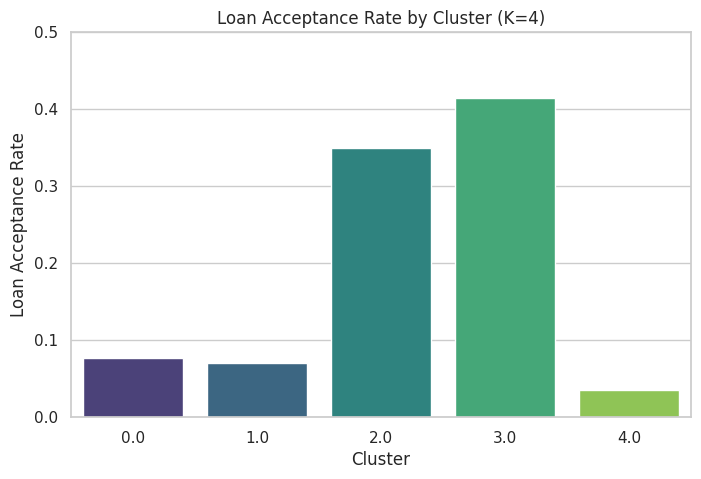

In [57]:
plt.figure(figsize=(8, 5))
sns.barplot(x=loan_acceptance_df.index, y=loan_acceptance_df["Loan Acceptance Rate"], palette="viridis")

plt.xlabel("Cluster")
plt.ylabel("Loan Acceptance Rate")
plt.title("Loan Acceptance Rate by Cluster (K=4)")
plt.ylim(0, 0.5)

plt.show()

###Cluster 2

In [66]:
cluster_2_data = df[df["Cluster_4"] == 2]

cluster_2_summary = cluster_2_data[["Age", "Income", "Education", "CreditCard", "CD Account", "Securities Account", "Credit_Usage_Ratio"]].mean()


detailed_cluster_2_analysis = pd.DataFrame({"Feature": cluster_2_summary.index, "Value": cluster_2_summary.values})
print("üìä Cluster 2 Á¥∞ÂàÜÁâπÂæµÔºö")
print(detailed_cluster_2_analysis)

üìä Cluster 2 Á¥∞ÂàÜÁâπÂæµÔºö
              Feature       Value
0                 Age   44.952381
1              Income  133.087302
2           Education    1.686508
3          CreditCard    0.273810
4          CD Account    0.174603
5  Securities Account    0.107143
6  Credit_Usage_Ratio    0.282445


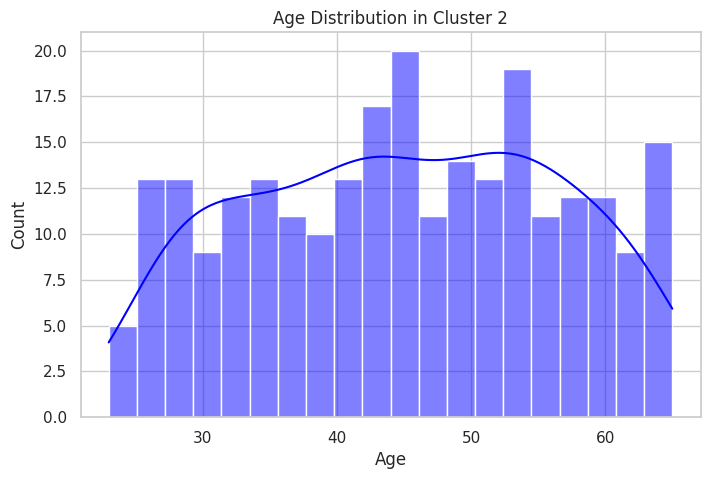

In [63]:
plt.figure(figsize=(8, 5))
sns.histplot(cluster_2_data["Age"], bins=20, kde=True, color="blue")
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Age Distribution in Cluster 2")
plt.show()

Ë°åÈä∑Á≠ñÁï•Ôºö

1. AI Êé®Ëñ¶Êô∫ËÉΩË≤∏Ê¨æÁµÑÂêà

* ‰ΩøÁî® ChatGPT / Gemini ÂàÜÊûêÂÆ¢Êà∂ÊàøË≤∏ËàáÁèæÈáëÊµÅÔºåÊèê‰æõ „ÄåÊàøË≤∏+ÂÄã‰∫∫Ë≤∏Ê¨æ„ÄçÊúÄ‰Ω≥ÁµÑÂêàÊñπÊ°à
‰æãÂ¶ÇÔºåÂ∞çÊñºÈ´òÊàøË≤∏‰ΩÜÁ©©ÂÆöÊî∂ÂÖ•ÁöÑÂÆ¢Êà∂ÔºåÂª∫Ë≠∞„Äå‰ΩéÊÅØË≤∏Ê¨æ‰æÜË£úÂÖÖË≥áÈáëÊµÅÂãïÊÄß„Äç
2. AI ÂÄãÊÄßÂåñÈáëËûçÈ°ßÂïè

* AI È©ÖÂãïÁöÑ Chatbot ÂèØÂàÜÊûêÂÆ¢Êà∂Ë≤°ÂãôÊï∏ÊìöÔºåÊèê‰æõÂ∞àÂ±¨Ë≤∏Ê¨æÂª∫Ë≠∞
* Êï¥ÂêàË™ûÈü≥ AI Âä©ÁêÜÔºåÊèê‰æõÂø´ÈÄüË≤∏Ê¨æÂí®Ë©¢ÊúçÂãôÔºàÈÄèÈÅéÈäÄË°å App ÂÖßÂª∫ ChatbotÔºâ
3. ÈáëËûç AI Âª£ÂëäÂÆöÂêëÊé®Êí≠

* ÈÄèÈÅé GenAI ÁîüÊàêÂãïÊÖãÂª£ÂëäÔºå‰∏ªÊâì„ÄåÈ´òÈ°çÊàøË≤∏ÈùàÊ¥ªË≥áÈáëËß£Ê±∫ÊñπÊ°à„Äç
* Á≤æÊ∫ñÊäïÊîæÊñºÊàøË≤∏Ë´ñÂ£á„ÄÅÁêÜË≤°Á§æÁæ§ & ÈáëËûçÊñ∞ËÅûÁ∂≤Á´ô
4. Êô∫ËÉΩ‰ø°Áî®Â¢ûÂÄºË®àÁï´

* ÈáùÂ∞ç‰ø°Áî®Âç°ÊåÅÊúâÁéá‰ΩéÁöÑÂïèÈ°åÔºåÊèê‰æõ„ÄåÊàøË≤∏+‰ø°Áî®Âç°„ÄçÂÑ™ÊÉ†Á∂ÅÂÆö
*‰æãÂ¶ÇÔºå„Äå‰ΩøÁî®‰ø°Áî®Âç°ÊîØ‰ªòÊàøË≤∏ÈÉ®ÂàÜÈáëÈ°çÔºåÂèØ‰∫´ 1% ÂõûÈ•ã„Äç



###Cluster 3



In [68]:
cluster_3_data = df[df["Cluster_4"] == 3]

cluster_3_summary = cluster_3_data[["Age", "Income", "Education", "CreditCard", "CD Account", "Securities Account", "Credit_Usage_Ratio"]].mean()


detailed_cluster_3_analysis = pd.DataFrame({"Feature": cluster_3_summary.index, "Value": cluster_3_summary.values})
print("üìä Cluster 3 Á¥∞ÂàÜÁâπÂæµÔºö")
print(detailed_cluster_3_analysis)

üìä Cluster 3 Á¥∞ÂàÜÁâπÂæµÔºö
              Feature      Value
0                 Age  45.581395
1              Income  97.945736
2           Education   1.910853
3          CreditCard   0.802326
4          CD Account   1.000000
5  Securities Account   0.500000
6  Credit_Usage_Ratio   0.340459


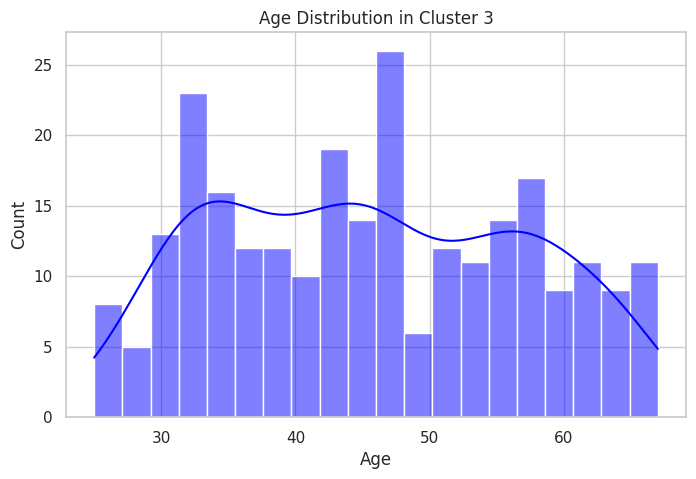

In [69]:
plt.figure(figsize=(8, 5))
sns.histplot(cluster_3_data["Age"], bins=20, kde=True, color="blue")
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Age Distribution in Cluster 3")
plt.show()

Ë°åÈä∑Á≠ñÁï•Ôºö

1. AI È©ÖÂãïÁöÑÊô∫ËÉΩÂ≠òË≤∏ÁµÑÂêà

* ÈÄèÈÅé GenAI ÁîüÊàêÂÄãÊÄßÂåñ„ÄåÈ´òÂà©ÁéáÂÆöÂ≠ò+‰ΩéÊÅØË≤∏Ê¨æ„ÄçÊñπÊ°à
* ‰æãÂ¶ÇÔºå„ÄåÂ≠òÊ¨æ 50K ‰ª•‰∏äÂèØÁç≤ÂæóË≤∏Ê¨æÂà©ÁéáÊäòÊâ£ 0.5%„Äç
2. AI Êô∫ËÉΩË°åÈä∑Êé®Êí≠

* ÈáùÂ∞çÊ≠§Áæ§È´îÁöÑ È´òÁ∂≤ÈäÄ‰ΩøÁî®ÁéáÔºåÈÄèÈÅé AI ËÅäÂ§©Ê©üÂô®‰∫∫Ëá™ÂãïÊé®ÈÄÅÂ∞àÂ±¨Ë≤∏Ê¨æÂÑ™ÊÉ†
* ‰æãÂ¶ÇÔºå„ÄåÊÇ®ÁöÑÁêÜË≤°È¢®Ê†ºÈÅ©ÂêàÈ´òÂõûÈ•ãÂÆöÂ≠òË≤∏Ê¨æÔºåÈªûÊìäÊü•ÁúãÂ∞àÂ±¨ÊñπÊ°à„Äç
3. Êô∫ËÉΩ‰ø°Áî®Â¢ûÂÄºÈ´îÈ©ó

* Êèê‰æõ„Äå‰ø°Áî®Ë≤∏Ê¨æ + È´òÈ°ç‰ø°Áî®Âç°„ÄçÂÑ™ÊÉ†ÁµÑÂêàÔºåÈºìÂãµÂÆ¢Êà∂ ÈñãÁ´ãÈ´òÈ°ç‰ø°Áî®Âç°ÊèêÂçá‰ø°Áî®È°çÂ∫¶
* GenAI ÁîüÊàêÂÄãÊÄßÂåñ‰ø°Áî®È°çÂ∫¶ÊèêÂçáÊñπÊ°àÔºåÂàÜÊûêÂÆ¢Êà∂Ë≤°ÂãôÁãÄÊ≥Å‰æÜÂÑ™ÂåñË≤∏Ê¨æÂà©Áéá
4. AI Êï∏ÊìöÈ©ÖÂãïÂÜçË°åÈä∑

* ÈÄèÈÅéÊ©üÂô®Â≠∏ÁøíÂàÜÊûêÔºåÁØ©ÈÅ∏ÊúÄÂèØËÉΩÊé•ÂèóË≤∏Ê¨æÁöÑÂÆ¢Êà∂
* GenAI ÁîüÊàê„ÄåÊô∫ËÉΩÂÆöÂ≠ò+Ë≤∏Ê¨æ„ÄçÊ®°Êì¨Â†¥ÊôØÔºåÂπ´Âä©ÂÆ¢Êà∂Ë®àÁÆóÁêÜË≤°Êî∂Áõä